In [14]:
%display latex
var('t') 
y = function('y')(t) 
P = function('P')(t) 
Q = function('Q')(t) 
DE = diff(y,t)==P*y+Q 
soln=desolve(DE,y,ivar=t) 
show(soln) 

In [27]:
var('t,c') 
t0 = 0 
# starting point for time 
t1 = 3 
# ending point for time
y0 = 1 
# starting y-value 
y = function('y')(t) 
P = function('P')(t) 
Q = function('Q')(t) 
P = -1/2 
Q = 2*cos(t)
DE = diff(y,t)==P*y+Q 
soln=desolve(DE,y,ivar=t,ics=[t0,y0]) 
show(soln.expand()) 

diff(y(t), t) == 2*cos(t) - 1/2*y(t)

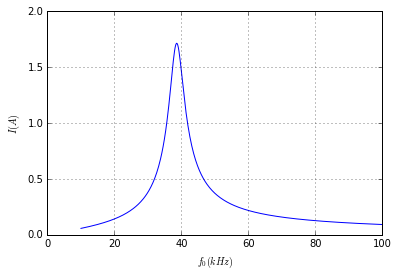

In [38]:
%matplotlib inline
import numpy
from matplotlib.pyplot import *

R=7.0
L=0.25e-3
C=68e-9
Us=12.0
f0=1.0/(2*pi*sqrt(L*C))
Q = 1.0/R*sqrt(L/C)
def courant(f):
    w=2*pi*f
    return Us/(R+1j*L*w+1/(1j*C*w))
freq = numpy.linspace(start=10000,
                    stop=200000,num=1000)
I=abs(courant(freq));
figure()
plot(freq/1000,I)
xlabel("$f_0 (kHz)$")
ylabel("$I (A)$")
axis([0,100,0,2])
grid()  

In [17]:
print(f0)

121267.812518166/pi


In [18]:
print(Q)

8.66198660844046


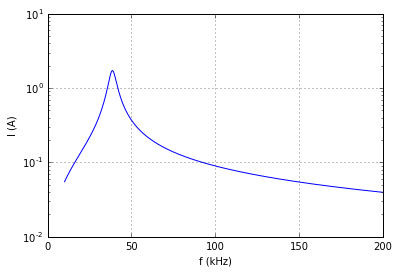

In [19]:
figure()
plot(freq/1000,I)
xlabel("f (kHz)")
ylabel("I (A)")
yscale('log')
grid()

Sur cet exemple, l'harmonique de rang 3 est réduite d'un facteur 20 environ par rapport au fondamental, ce qui permet d'obtenir un courant quasi-sinusoïdal. Pour le chauffage par induction, il n'est pas important que le courant soit parfaitement sinusoïdal, mais pour une faire une étude expérimentale du chauffage, il est préférable d'avoir une forme quasi-sinusoïdale. Par ailleurs, des hautes fréquences dans le champ de la bobine apportent des perturbations électromagnétiques dans l'environnement, et sont donc à éviter.

La résistance R doit être choisie pour que le courant à la résonance ne dépasse pas le courant maximal que le générateur peut fournir en mode de stabilisation en tension. Nous avons utilisé une alimentation pouvant en principe fournir jusqu'à 3 A en continu pour une tension jusqu'à 30 V. La résistance de 7 Ω permet de limiter le courant de crête à 1,7 A lorsque la tension d'alimentation est de 12 V. Pour augmenter encore ce courant, on peut augmenter la tension d'alimentation.

Cette méthode d'alimentation n'est pas très efficace en terme de conversion d'énergie, puisque la résistance R dissipe une énergie importante. La valeur efficace du courant est ici de l'ordre de 1 A, soit une puissance dissipée dans la résistance de l'ordre de 10 W.

Une autre grandeur importante est la tension aux bornes du condensateur :

VC=Us1-LCω2+jRCω=Uc1-f2f02+j1Qff0

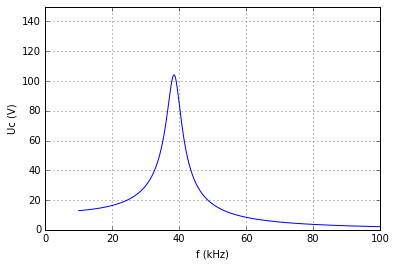

In [22]:
def tensionC(f):
    w=2*pi*f
    return Us/(1-L*C*w^2+1j*R*C*w)
uc = abs(tensionC(freq))
figure()
plot(freq/1000,uc)
xlabel("f (kHz)")
ylabel("Uc (V)")
axis([0,100,0,150])
grid()

L'amplitude de la tension aux bornes du condensateur atteint 100 V, ce qui est une conséquence du facteur de qualité élevé. Cette valeur de tension est au dessus de la limite de sécurité de 50 V pour les tensions alternatives 50 Hz. Il s'agit cependant d'une fréquence élevée, pour laquelle les dangers ne sont pas du tout les mêmes qu'à 50 Hz, et sont encore mal connus. À cette fréquence, il y a probablement moins de risque d'électrisation profonde avec atteinte cardiaque, mais le risque de brûlure est augmenté. Quoi qu'il en soit, on ne doit pas toucher le circuit pendant son fonctionnement.

En présence d'un induit dans la bobine (la pièce métallique à chauffer), le schéma électrique doit être modifié. Une première approche consiste à placer une résistance en parallèle avec l'inductance, pour représenter les pertes par effet Joule dans l'induit 

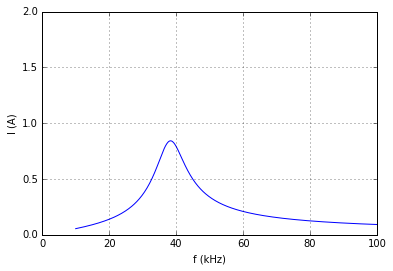

In [24]:
Rp=500.0
def courantAvecInduit(f):
    w=2*numpy.pi*f
    return Us/(R+1.0/(1.0/(1j*L*w)+1.0/Rp)+1/(1j*C*w))
freq = numpy.linspace(start=10000,stop=200000,num=1000)
I=numpy.absolute(courantAvecInduit(freq))
figure()
plot(freq/1000,I)
xlabel("f (kHz)")
ylabel("I (A)")
axis([0,100,0,2])
grid()          

Nous avons choisi la valeur de la résistance Rp pour que le courant à la résonance soit réduit d'un facteur deux environ. 

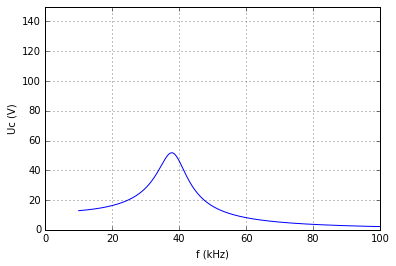

In [25]:
def tensionCavecInduit(f):
    w=2*numpy.pi*f
    return Us/(1+1j*C*w*1/(1/(1j*L*w)+1/Rp)+1j*R*C*w)
uc = numpy.absolute(tensionCavecInduit(freq))
figure()
plot(freq/1000,uc)
xlabel("f (kHz)")
ylabel("Uc (V)")
axis([0,100,0,150])
grid()

In [37]:
var("w")
Us/(R+1j*L*w+1/(1j*C*w))

12.0000000000000/(0.000250000000000000*I*w - 1.47058823529412e7*I/w + 7.00000000000000)